In [1]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random

np.random.seed(42)
random.seed(42)


# Exercise 1: Pearson vs Spearman Correlation (4 points)

## Objective
Understand and compare how **Pearson** and **Spearman** correlations measure relationships between variables —  
specifically **linear** versus **monotonic** associations — using real-world data from the **World Happiness Report (2024)**.

---

## Dataset: World Happiness Report (2024)

This dataset, provided to you from Kaggle, summarizes survey data collected from over 130 countries worldwide.  
Each record represents one country and its average well-being score based on multiple social and economic indicators.

---

### Goal of This Exercise
You will:
1. Compute and compare **Pearson** and **Spearman** correlations for all predictors with **Ladder score (Happiness)**.  
2. Visualize the relationships between happiness and its key factors using **scatterplots with trendlines**.  
3. Identify which features show **linear**, **nonlinear**, or **noisy** relationships — where Pearson and Spearman diverge.  
4. Interpret the findings to understand when each method should be preferred.

---



In [2]:

# Load dataset
url = "World-happiness-report-2024.csv"
df = pd.read_csv(url)

# Basic info
df.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


c:\Users\adamk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adamk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adamk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adamk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

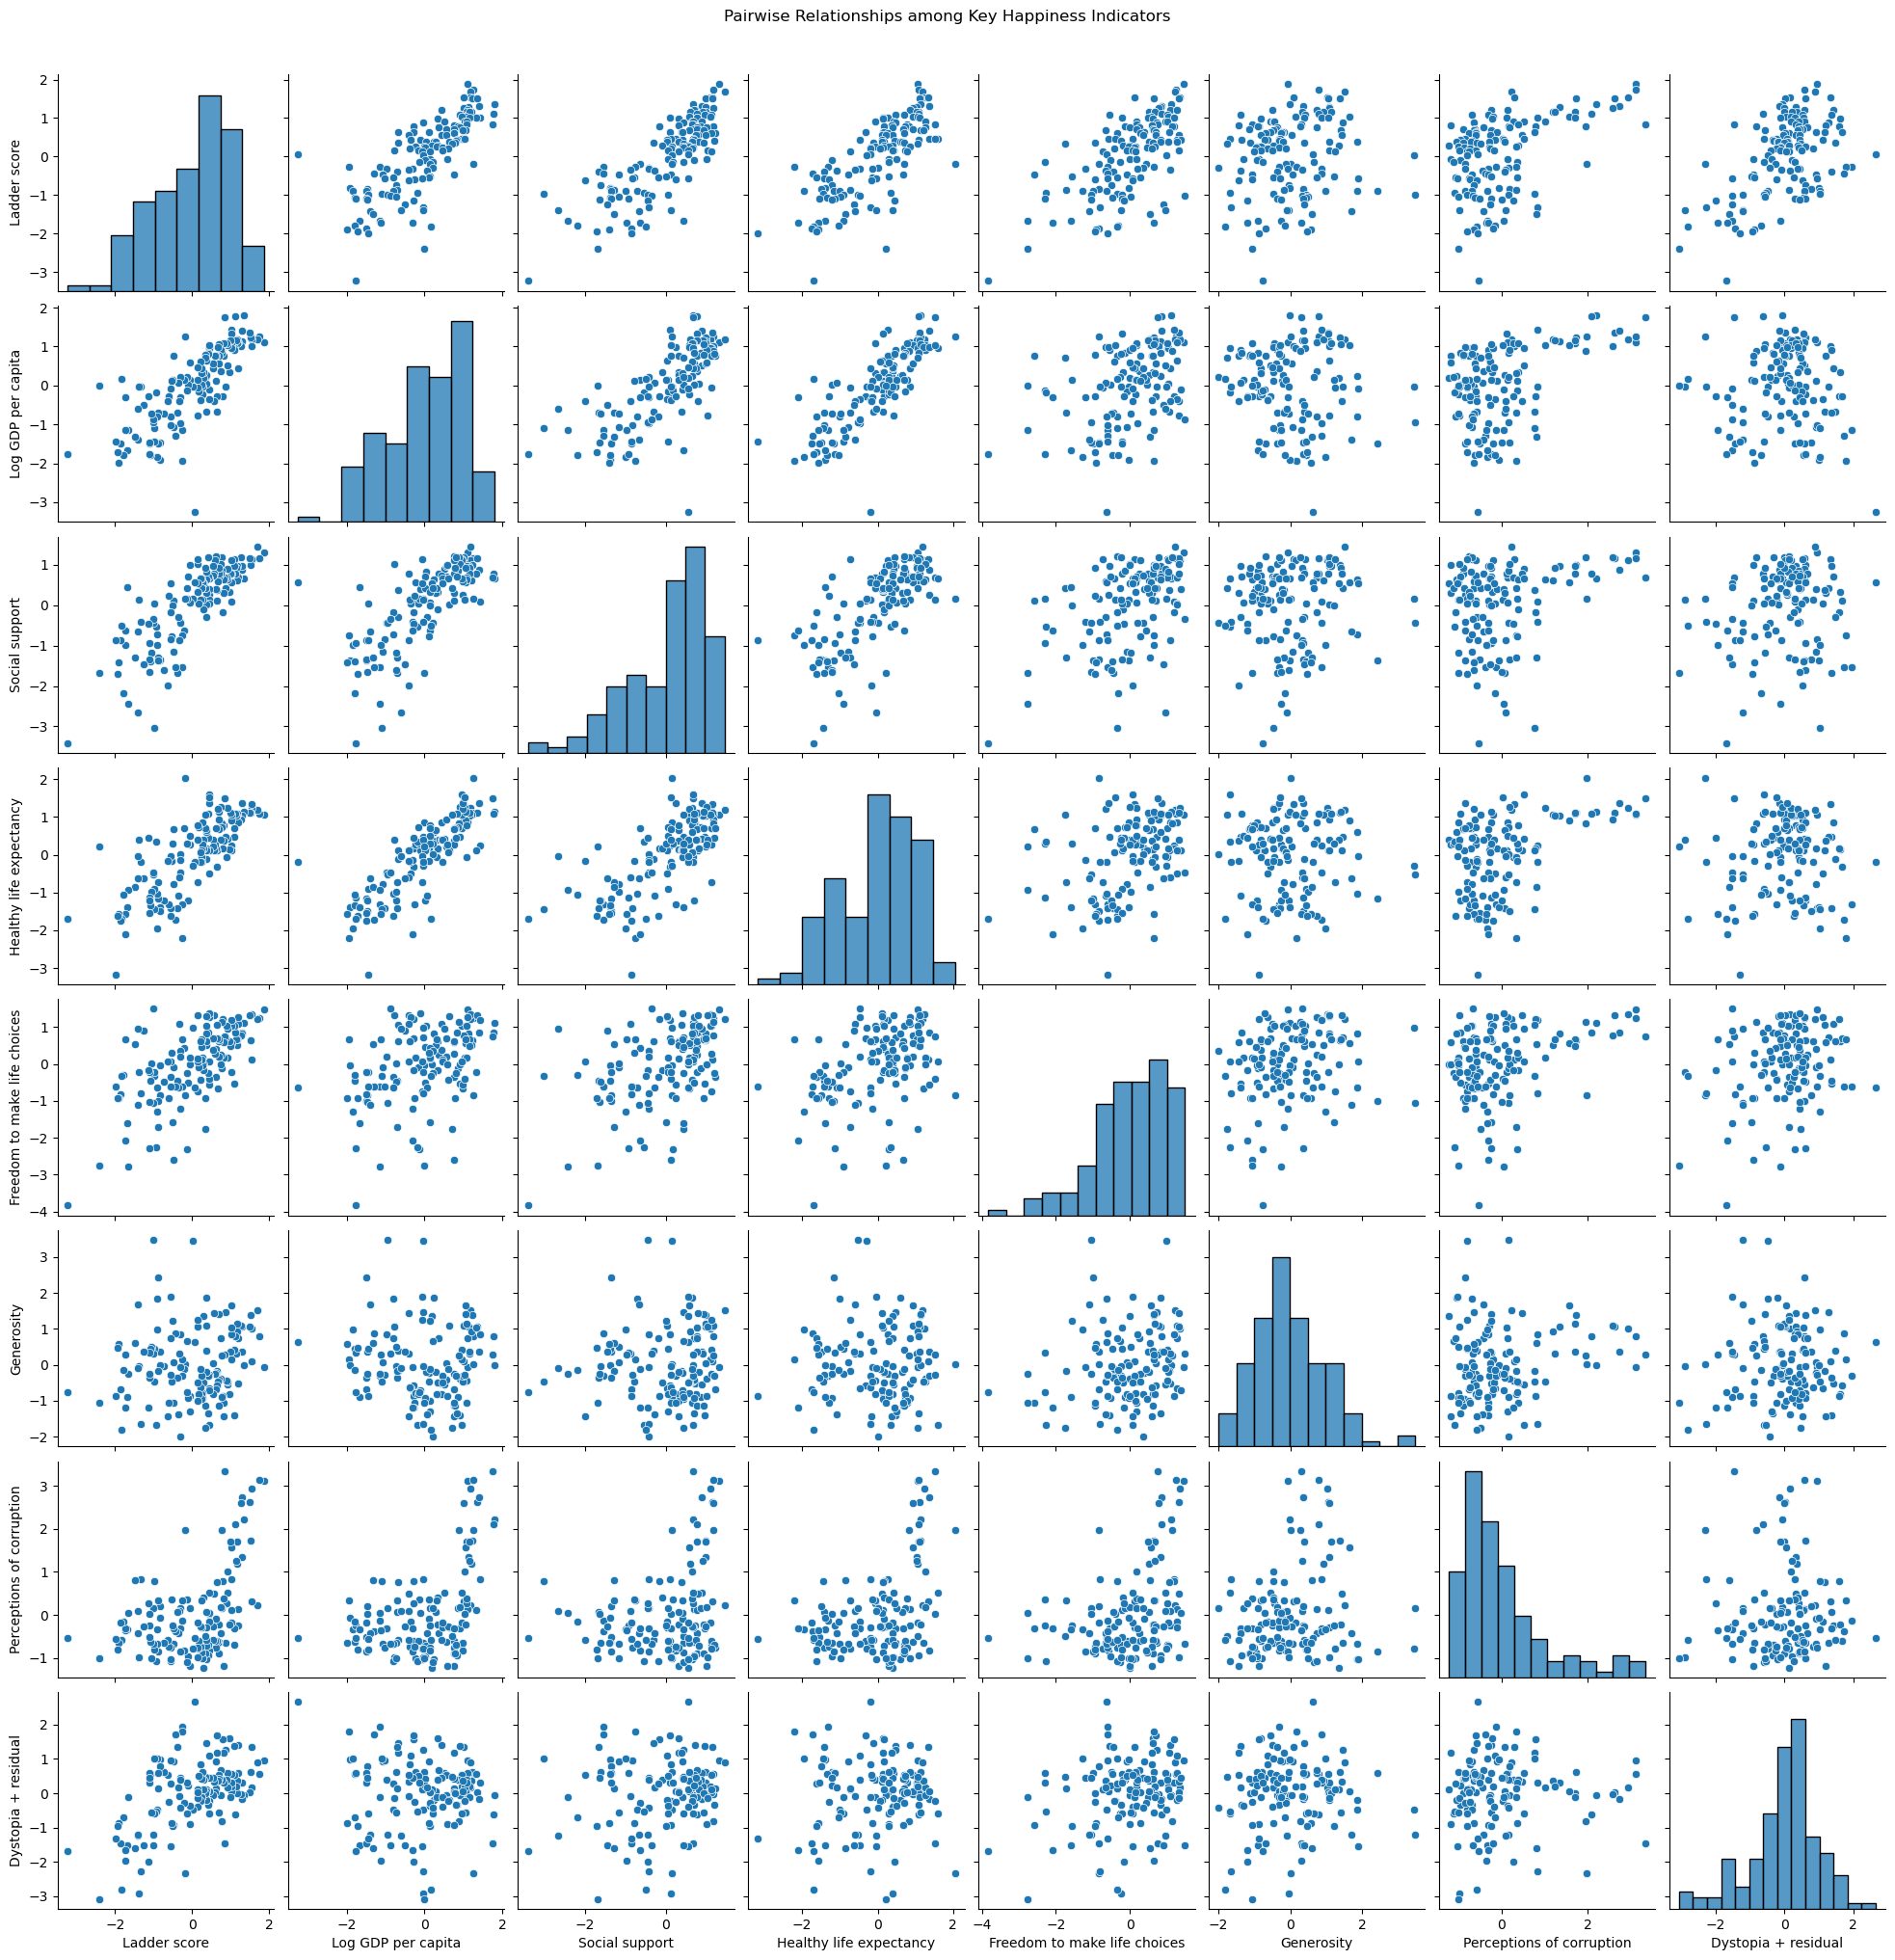

In [3]:
happiness_columns = ["Ladder score", "Log GDP per capita", 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Dystopia + residual' ]
df = df[happiness_columns].dropna()
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
sns.pairplot(df[happiness_columns])
plt.suptitle("Pairwise Relationships among Key Happiness Indicators", y=1.02)
plt.show()


## TODO (Exercise 1.1) (2 points)

In this step, you will calculate how strongly each factor is related to **Happiness (Ladder score)** using two correlation methods:

1. **Pearson correlation**.  

2. **Spearman correlation**.  

### Instructions
- Use the `.corr()` function in pandas to compute both Pearson and Spearman correlation coefficients.  
- Extract only the correlations with **'Ladder score'**.  
- Sort the results from highest to lowest to see which factors have the strongest relationship with happiness.  



In [14]:
# ------------------------------------------------
# TODO Implement Pearson and Spearman Correlations
# ------------------------------------------------

pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
pearson_corr = pearson_corr['Ladder score']
spearman_corr = spearman_corr['Ladder score']
# ----------------------------
# Implementation Ends Here
# ----------------------------

compare = pd.DataFrame({'Pearson': pearson_corr, 'Spearman': spearman_corr})
compare = compare.drop('Ladder score', errors='ignore')
compare


,Pearson,Spearman
Log GDP per capita,0.768504,0.824525
Social support,0.813542,0.819585
Healthy life expectancy,0.759659,0.776154
Freedom to make life choices,0.644451,0.634711
Generosity,0.130038,0.149394
Perceptions of corruption,0.451829,0.402201
Dystopia + residual,0.533542,0.432279


## **Exercise 1.2 – Visualizing Correlations with Regression Plots** (2 points)

In this exercise, you will **visualize and quantify the relationships** between key factors and the **Happiness (Ladder score)** using scatter plots and correlation metrics.

Each subplot will show how a specific feature (e.g., GDP, life expectancy, social support) relates to happiness, helping you identify both **direction** (positive or negative) and **strength** of association.

---

### **Instructions**

For each feature in `happiness_columns`, calculate two types of correlation with **`Ladder score`**:

   - **Pearson correlation** 
   - **Spearman correlation** 

*Hint:* Both correlations can be computed using functions from `scipy.stats`.

---

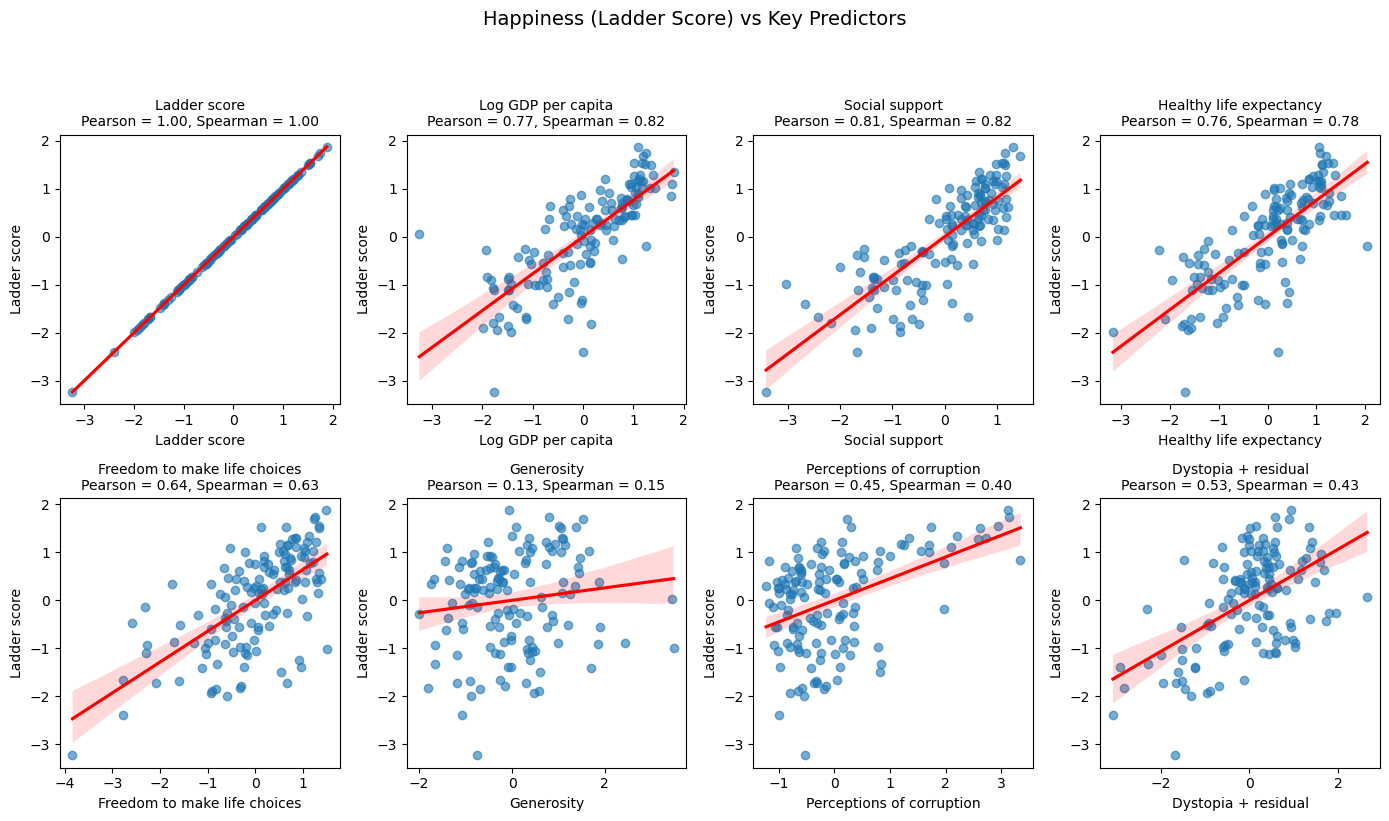

In [15]:

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(happiness_columns):
    sns.regplot(
        data=df,
        x=col,
        y='Ladder score',
        ax=axes[i],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )

    # ------------------------------------------------
    # TODO Implement Pearson and Spearman Correlations
    # ------------------------------------------------
    pearson_val, _ = pearsonr(df[col], df['Ladder score'])
    spearman_val, _ = spearmanr(df[col], df['Ladder score'])

    # ----------------------------
    # Implementation Ends Here
    # ----------------------------
    
    axes[i].set_title(
        f"{col}\nPearson = {pearson_val:.2f}, Spearman = {spearman_val:.2f}",
        fontsize=10
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Ladder score")

# Adjust layout and title
plt.suptitle("Happiness (Ladder Score) vs Key Predictors", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Exercise 2: Simpson’s Paradox (6 points)

## Objective
Understand **Simpson’s Paradox** — a situation where a trend appears in aggregated data but reverses or disappears when the data are divided into groups.

You’ll explore this paradox using the **World Happiness Report (2024)** dataset, by analyzing the relationship between **GDP per capita** and **Happiness**, both overall and within different **world regions**.

---

**Example idea:**  

Globally, countries with higher GDP have higher happiness.  But within each region, that relationship might weaken or even reverse.

---


In [16]:
df = pd.read_csv("World-happiness-report-2024.csv")
df = df.dropna()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


## **Exercise 2.1 – Global Relationship: GDP vs Happiness** (3 points)

In this exercise, you will focus on a single predictor — **Log GDP per capita** — to explore its global relationship with **Happiness (Ladder score)**.  
You will calculate the correlation between these two variables and visualize their linear trend.

---

### **Instructions**

**Compute both correlation coefficients** between `Log GDP per capita` and `Ladder score`:

   - **Pearson correlation** 
   - **Spearman correlation**

*Hint:* You can find both correlation functions in `scipy.stats`.



Global Pearson correlation (GDP vs Happiness): 0.77
Global Spearman correlation (GDP vs Happiness): 0.82


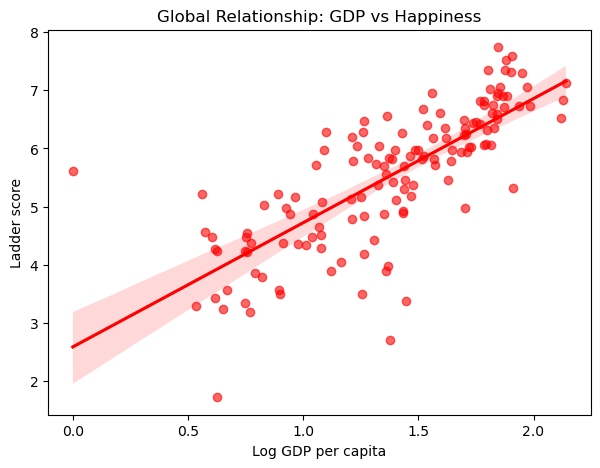

In [17]:

# -----------------------------------------------------------------------------
# TODO Implement Pearson Spearman Correlations for predictor Log GDP per capita
# -----------------------------------------------------------------------------

pearson_global, _ = pearsonr(df['Log GDP per capita'], df['Ladder score'])
spearman_global, _ = spearmanr(df['Log GDP per capita'], df['Ladder score'])
print(f"Global Pearson correlation (GDP vs Happiness): {pearson_global:.2f}")
print(f"Global Spearman correlation (GDP vs Happiness): {spearman_global:.2f}")


# ----------------------------
# Implementation Ends Here
# ----------------------------

plt.figure(figsize=(7,5))
sns.regplot(data=df, x='Log GDP per capita', y='Ladder score', color='red', scatter_kws={'alpha':0.6})
plt.title("Global Relationship: GDP vs Happiness")
plt.show()



## **Exercise 2.2 – Regional Correlations: GDP vs Happiness** (3 points)

In this exercise, you will analyze how the relationship between **Log GDP per capita** and **Happiness (Ladder score)** varies **across regions**.  
This helps you understand whether the global GDP–Happiness trend is consistent or differs regionally.

---

### **Instructions**

1. **Group the data by region** using the column `Regional indicator`.

2. **Within each region**, compute the **Pearson correlation** between:
   - `Log GDP per capita`
   - `Ladder score`


Hint - Use: pearsonr from scipy.stats

*Another Hint:* You can follow these steps to compute the correlation by region:

1. **Group the data** by `Regional indicator` using the `groupby()` method.  
2. **Within each group**, calculate the correlation between `Log GDP per capita` and `Ladder score` using a correlation function such as `pearsonr` from `scipy.stats`.  
3. **Extract the correlation value** (the first element returned by `pearsonr`).  
4. **Sort the results** to identify which regions show the strongest positive or negative relationships.  



In [18]:
# ---------------------------------------------------------------------------------------
# TODO Implement Pearson Spearman Correlations for predictor Log GDP per capita by region
# ----------------------------------------------------------------------------------------
regional_corr = df.groupby('Regional indicator').apply(lambda x: pearsonr(x['Log GDP per capita'], x['Ladder score'])[0]).reset_index()
regional_corr.columns = ['Regional indicator', 'Pearson Correlation (GDP vs Happiness)']

# ----------------------------
# Implementation Ends Here
# ----------------------------

print("Regional Pearson correlations (GDP vs Happiness):")
display(regional_corr)


Regional Pearson correlations (GDP vs Happiness):


,Regional indicator,Pearson Correlation (GDP vs Happiness)
0,Central and Eastern Europe,0.543341
1,Commonwealth of Independent States,-0.000146
2,East Asia,0.116202
3,Latin America and Caribbean,0.484410
4,Middle East and North Africa,0.762412
5,North America and ANZ,-0.847586
6,South Asia,0.583969
7,Southeast Asia,0.814052
8,Sub-Saharan Africa,0.372251
9,Western Europe,0.541804


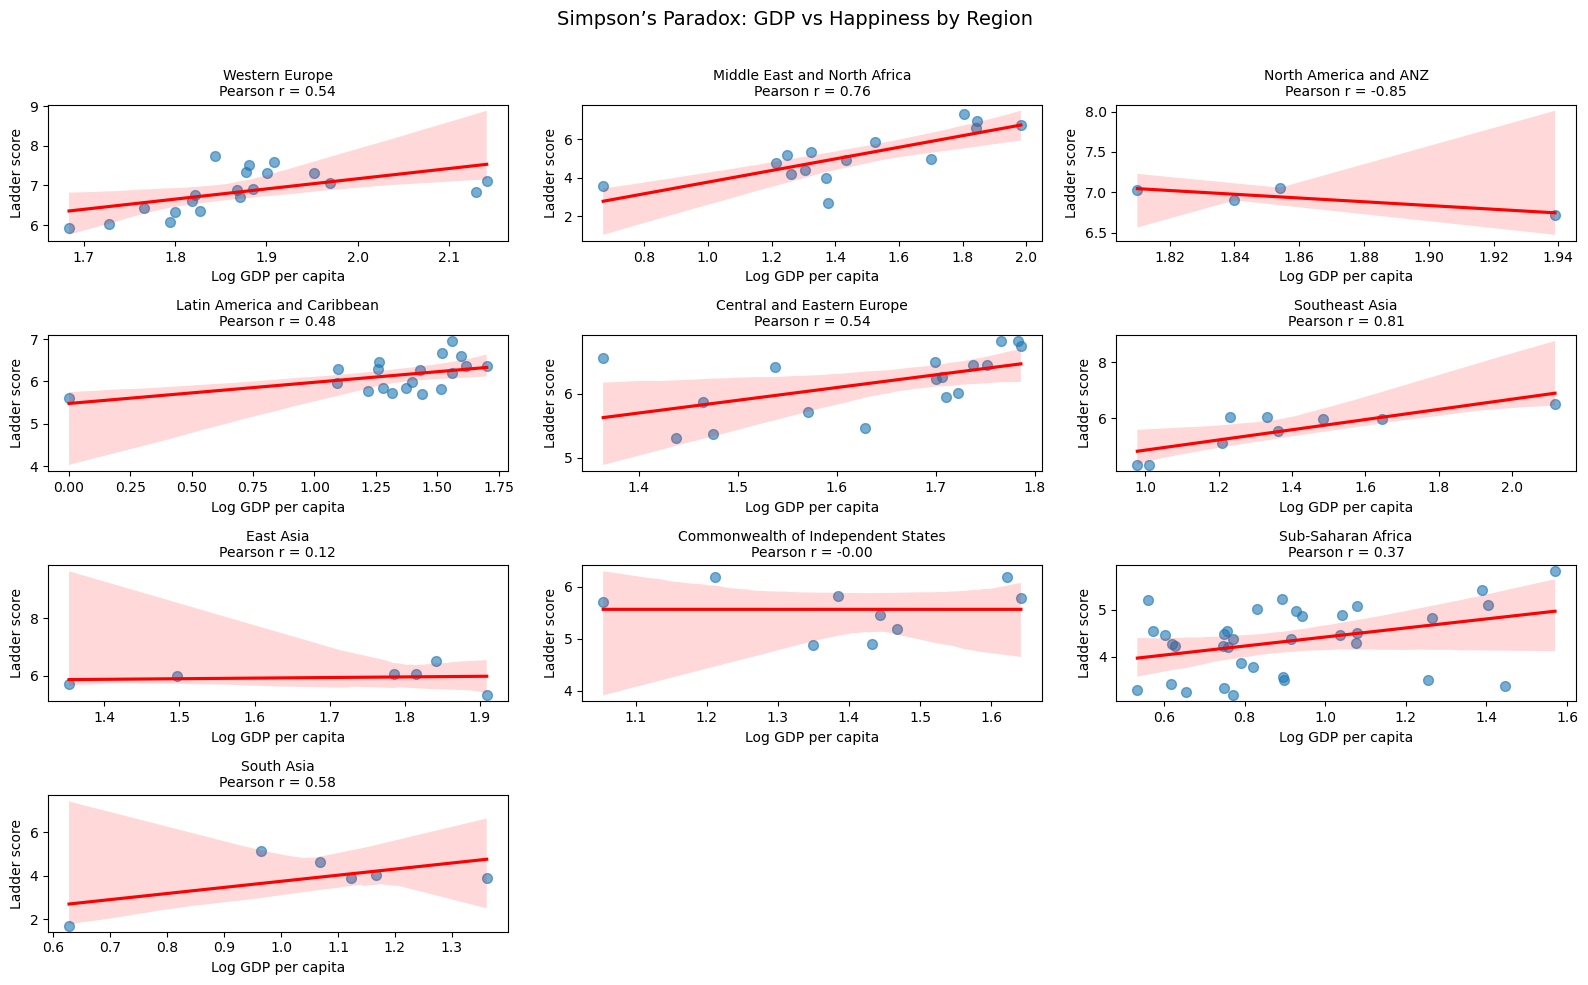

In [19]:
# Get list of unique regions
regions = df['Regional indicator'].unique()
num_regions = len(regions)

# Determine grid size automatically
ncols = 3
nrows = (num_regions + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
axes = axes.flatten()

for i, region in enumerate(regions):
    sub = df[df['Regional indicator'] == region]

    # Compute regional Pearson correlation
    pearson_val, _ = pearsonr(sub['Log GDP per capita'], sub['Ladder score'])

    sns.regplot(
        data=sub,
        x='Log GDP per capita',
        y='Ladder score',
        ax=axes[i],
        scatter_kws={'alpha':0.6, 's':50},
        line_kws={'color':'red'}
    )
    
    axes[i].set_title(f"{region}\nPearson r = {pearson_val:.2f}", fontsize=10)
    axes[i].set_xlabel("Log GDP per capita")
    axes[i].set_ylabel("Ladder score")

# Remove unused subplots if regions < grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Simpson’s Paradox: GDP vs Happiness by Region", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Exercise 3: Digital Wellbeing and Happiness Prediction Using Decision Trees (14 points)

### Objective: Learn how to apply **Decision Trees** for **classification tasks** using a real-world dataset on digital wellbeing. You will explore how behavioral factors like screen time, sleep quality, stress, and exercise relate to happiness and train decision tree models using different splitting criteria.

> **How can we tell which features matter and whether the model is good — without consulting an oracle?**

---

### **Focus Areas**

1. **Feature Importance**
   - Examine which variables the Decision Tree considers most influential.

2. **Model Evaluation Without an Oracle**
   - Evaluate metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.
   - Review the **confusion matrix** to understand where the model succeeds or fails.


In [20]:

#Load Dataset

df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
print("Shape:", df.shape)
df.head()

# Drop ID column (non-informative)
df = df.drop(columns=["User_ID"])

#Create Target Variable
# Happy (>=8) → 1, Unhappy (<8) → 0
df["Happiness_Status"] = np.where(df["Happiness_Index(1-10)"] >= 8, 1, 0)

# Drop the original happiness index to avoid leakage
df = df.drop(columns=["Happiness_Index(1-10)"])

# Encode Categorical Variables

categorical_cols = ["Gender", "Social_Media_Platform"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


df_encoded



Shape: (500, 10)


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Status,Gender_Male,Gender_Other,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,1,True,False,False,False,False,False,False
1,30,5.1,7.0,8.0,5.0,3.0,1,False,True,False,True,False,False,False
2,23,7.4,6.0,7.0,1.0,3.0,0,False,True,False,False,False,False,True
3,36,5.7,7.0,8.0,1.0,1.0,1,False,False,False,False,True,False,False
4,34,7.0,4.0,7.0,5.0,1.0,1,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,6.9,5.0,7.0,4.0,2.0,1,True,False,False,False,False,True,False
496,43,5.6,7.0,6.0,5.0,2.0,1,False,False,False,False,False,False,False
497,41,7.7,5.0,7.0,2.0,2.0,1,True,False,False,True,False,False,False
498,23,4.2,9.0,7.0,0.0,2.0,1,True,False,False,False,False,False,False


## **Exercise 3.1 – Feature Correlation with Happiness Status** (2 points)

In this exercise, you will compute how strongly each encoded feature is related to **Happiness_Status** (binary classification: Happy vs Unhappy).  
You will use two correlation methods to capture both linear and rank-based relationships between predictors and happiness.

---

### **Instructions**

1. **Work with the encoded dataset** `df_encoded`, which includes numerical and categorical variables converted into numeric form.

2. **Compute correlation coefficients** between each feature and the target variable `Happiness_Status` using:
   - **Pearson correlation** on Happiness_Status
   - **Spearman correlation** on Happiness_Status




In [21]:
# ------------------------------------------------
# TODO Implement Pearson and Spearman Correlations
# ------------------------------------------------

pearson_corr = df_encoded.corr(method='pearson')
spearman_corr = df_encoded.corr(method='spearman')
pearson_corr = pearson_corr['Happiness_Status']
spearman_corr = spearman_corr['Happiness_Status']

# ----------------------------
# Implementation Ends Here
# ----------------------------

compare = pd.DataFrame({'Pearson': pearson_corr, 'Spearman': spearman_corr})
compare = compare.drop('Ladder score', errors='ignore')
compare



,Pearson,Spearman
Age,0.043319,0.042753
Daily_Screen_Time(hrs),-0.549756,-0.552807
Sleep_Quality(1-10),0.520968,0.523940
Stress_Level(1-10),-0.562266,-0.579965
Days_Without_Social_Media,0.054194,0.057427
Exercise_Frequency(week),0.043354,0.033611
Happiness_Status,1.000000,1.000000
Gender_Male,-0.031785,-0.031785
Gender_Other,0.050148,0.050148
Social_Media_Platform_Instagram,-0.082855,-0.082855


## **Exercise 3.2 – Splitting the Dataset into Training and Testing Sets** (2 points)

In this exercise, you will split your encoded dataset into **training** and **testing** subsets to prepare for model building.  
This ensures that you can train your model on one portion of the data and evaluate its performance on unseen data, avoiding overfitting.

---

### **Instructions**
Use sklearn train_test_split
   ```python
   from sklearn.model_selection import train_test_split 

   params := (X, y, test_size=0.3, random_state=42, stratify=y)


In [22]:

X = df_encoded.drop("Happiness_Status", axis=1)
y = df_encoded["Happiness_Status"]


# --------------------------------------------------------------------------
# TODO Slipt your dataset into Train and Test using sklearn train_test_split
# --------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ----------------------------
# Implementation Ends Here
# ----------------------------

print("Train size:", X_train.shape, " Test size:", X_test.shape)




Train size: (350, 13)  Test size: (150, 13)


## **Exercise 3.3 – Building Decision Trees with Different Splitting Criteria** (4 points)

In this exercise, you will train and evaluate **Decision Tree classifiers** using three different impurity measures:
- **Gini Index**
- **Entropy**
- **Log Loss**

The goal is to compare how each criterion affects the model’s performance and decision boundaries.

---

### **Instructions**

1. For each criterion (`"gini"`, `"entropy"`, and `"log_loss"`), build and train a Decision Tree model using the training data.  
2. Evaluate each model on the test set and record the **accuracy score**.  
3. Use random_state = 42. 

---


Criterion: GINI
Accuracy: 0.793
------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

     Unhappy       0.62      0.61      0.62        41
       Happy       0.85      0.86      0.86       109

    accuracy                           0.79       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.79      0.79      0.79       150



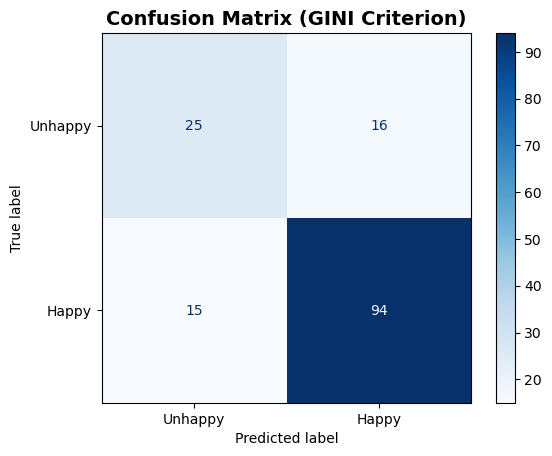


Criterion: ENTROPY
Accuracy: 0.773
------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

     Unhappy       0.57      0.66      0.61        41
       Happy       0.86      0.82      0.84       109

    accuracy                           0.77       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.78      0.77      0.78       150



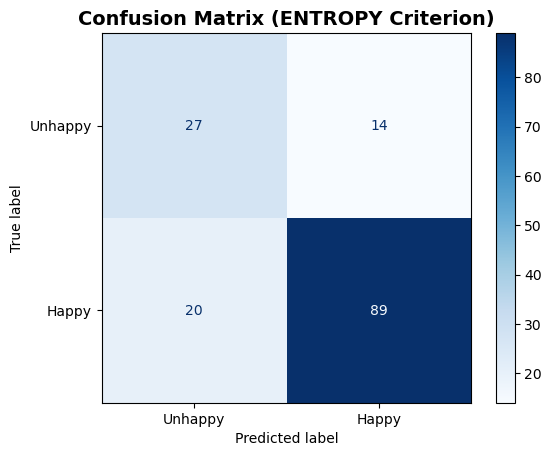


Criterion: LOG_LOSS
Accuracy: 0.773
------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

     Unhappy       0.57      0.66      0.61        41
       Happy       0.86      0.82      0.84       109

    accuracy                           0.77       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.78      0.77      0.78       150



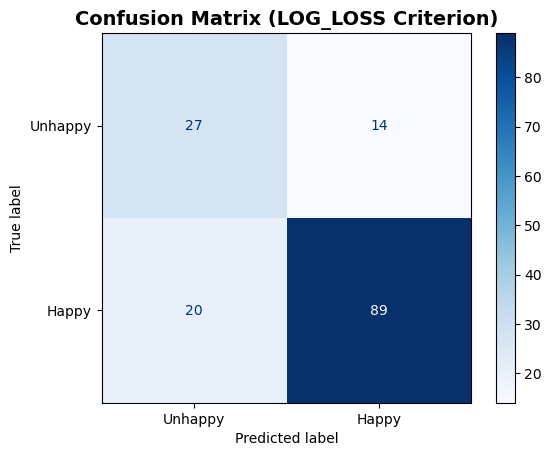

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

criteria = ["gini", "entropy", "log_loss"] 
results = {}

for c in criteria:
    # --------------------------------------------------------------------------
    # TODO Implement Decision Trees for all the three criterion mentioned above
    # --------------------------------------------------------------------------
    clf = DecisionTreeClassifier(criterion=c, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # ----------------------------
    # Implementation Ends Here
    # ----------------------------
    results[c] = {"model": clf, "accuracy": acc}
    
    print(f"\n{'='*60}")
    print(f"Criterion: {c.upper()}")
    print(f"Accuracy: {acc:.3f}")
    print("-" * 60)
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Unhappy", "Happy"]))
    
    # Confusion matrix visualization
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=["Unhappy", "Happy"],
        cmap="Blues",
        values_format=".0f"
    )
    plt.title(f"Confusion Matrix ({c.upper()} Criterion)", fontsize=14, fontweight="bold")
    plt.grid(False)
    plt.show()


## **Exercise 3.4 – Exploring Decision Tree Hyperparameters** (4 points)

In this exercise, you will explore how **Decision Tree performance** changes with different model configurations.  
You’ll systematically vary three parameters — **splitting criterion**, **maximum depth**, and **minimum samples required to split** — to observe their effect on accuracy and F1-score.

---

### **Instructions**

1. **Loop over multiple configurations:**
   - Use the following lists for testing:
     - `criteria = ['gini', 'entropy', 'log_loss']`
     - `depth_values = [4, 6, 8, 10]`
     - `min_samples_split = [2, 5, 10, 20]`

2. For each combination:
   - Build and train a **DecisionTreeClassifier** using the specified parameters.  
   - Use random_state = 42 for the classifier
   - Evaluate its performance on the test data.

3. **Compute and record metrics:**
   - **Accuracy** – overall prediction correctness.  
   - **F1 Score** – balance between precision and recall.

---


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, classification_report
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


depth_values = [4, 6, 8, 10]
min_samples_values = [2, 5, 10, 20]
criteria = ['gini', 'entropy', 'log_loss']

records = []

for crit in criteria:
    for max_depth in depth_values:
        for min_split in min_samples_values:
            # --------------------------------------------------------------------------------------------
            # TODO Implement Decision Trees for all the three criteria, depth_values and min_sample_values
            # --------------------------------------------------------------------------------------------
            clf = DecisionTreeClassifier(criterion=crit, max_depth=max_depth, min_samples_split=min_split, random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            # --------------------------------------------------------------------------------------------
            # TODO Compute Accuracy and F1 scores
            # --------------------------------------------------------------------------------------------
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # ----------------------------
            # Implementation Ends Here
            # ----------------------------
            records.append({
                "Criterion": crit,
                "Max Depth": max_depth,
                "Min Samples Split": min_split,
                "Accuracy": acc,
                "F1 Score": f1,
                "Model": clf
            })

# Convert to DataFrame
results_df = pd.DataFrame(records)

# Display neatly sorted table
display(
    results_df.sort_values(by="Accuracy", ascending=False)
    .reset_index(drop=True)
    .style.background_gradient(subset=["Accuracy", "F1 Score"], cmap="YlGn")
    .format({"Accuracy": "{:.3f}", "F1 Score": "{:.3f}"})
    .set_caption("Decision Tree Performance Across Hyperparameters")
)

plt.tight_layout()
plt.show()


,Criterion,Max Depth,Min Samples Split,Accuracy,F1 Score,Model
0,log_loss,6,2,0.840,0.888,"DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=42)"
1,log_loss,6,5,0.840,0.888,"DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_split=5, random_state=42)"
2,entropy,6,5,0.840,0.888,"DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5, random_state=42)"
3,entropy,6,2,0.840,0.888,"DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)"
4,log_loss,4,5,0.833,0.887,"DecisionTreeClassifier(criterion='log_loss', max_depth=4, min_samples_split=5, random_state=42)"
5,entropy,4,5,0.833,0.887,"DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5, random_state=42)"
6,entropy,4,2,0.833,0.887,"DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)"
7,log_loss,4,2,0.833,0.887,"DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=42)"
8,entropy,4,10,0.827,0.882,"DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, random_state=42)"
9,entropy,4,20,0.827,0.882,"DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20, random_state=42)"


<Figure size 640x480 with 0 Axes>

## **Exercise 3.5 – Evaluating and Interpreting the Best Decision Tree Model** (2 points)

In this exercise, you will identify the **best-performing Decision Tree model** from all tested hyperparameter combinations and evaluate it using multiple performance metrics and visualizations.

---

### **Instructions**
**Compute model performance metrics:**
   - Calculate and print using sklean packages on y_test, y_pred_best:
     - **Accuracy**
     - **Precision**
     - **Recall**
     - **F1 Score**


---



BEST MODEL FOUND
Criterion          : ENTROPY
Max Depth          : 6
Min Samples Split  : 2
Accuracy           : 0.840
F1 Score           : 0.888

Classification Metrics Summary
----------------------------------------------------------------------
Accuracy       : 0.840
Precision      : 0.905
Recall         : 0.872
F1 Score       : 0.888
----------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

     Unhappy       0.69      0.76      0.72        41
       Happy       0.90      0.87      0.89       109

    accuracy                           0.84       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.85      0.84      0.84       150



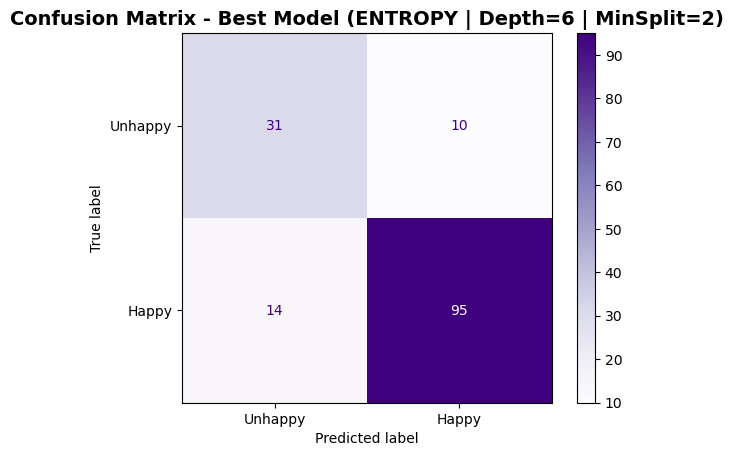

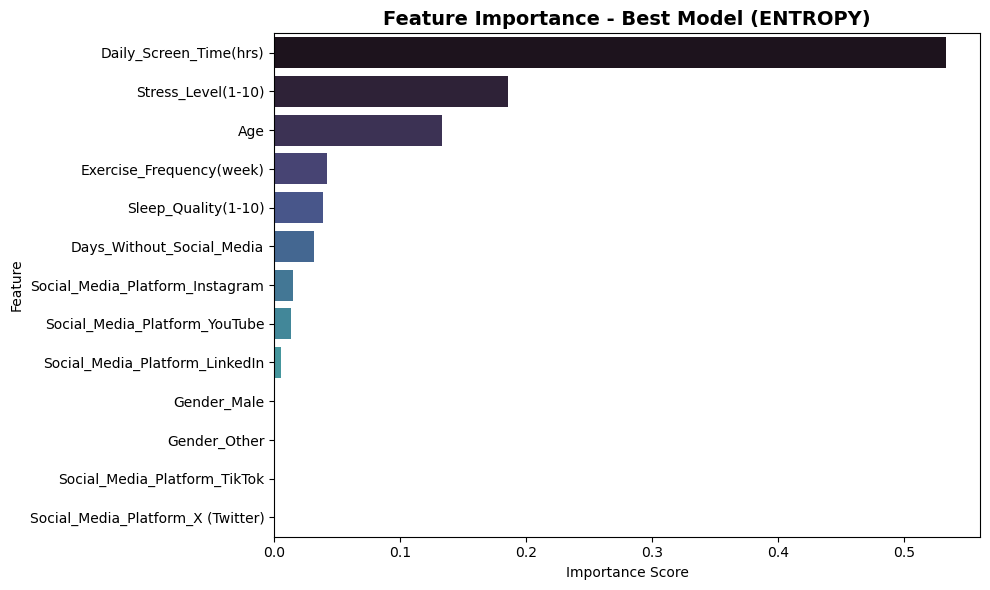

In [25]:
best_row = results_df.loc[results_df["Accuracy"].idxmax()]
best_model = best_row["Model"]

print(f"\n{'='*70}")
print(f"BEST MODEL FOUND")
print('='*70)
print(f"Criterion          : {best_row['Criterion'].upper()}")
print(f"Max Depth          : {best_row['Max Depth']}")
print(f"Min Samples Split  : {best_row['Min Samples Split']}")
print(f"Accuracy           : {best_row['Accuracy']:.3f}")
print(f"F1 Score           : {best_row['F1 Score']:.3f}")
print('='*70)


y_pred_best = best_model.predict(X_test)

# --------------------------------------------------------------------------------------------
# TODO Compute Accuracy, F1, recall and precision scores on y_test and y_pred_best
# --------------------------------------------------------------------------------------------

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)


# ----------------------------
# Implementation Ends Here
# ----------------------------

print("\nClassification Metrics Summary")
print("-" * 70)
print(f"Accuracy       : {acc:.3f}")
print(f"Precision      : {prec:.3f}")
print(f"Recall         : {rec:.3f}")
print(f"F1 Score       : {f1:.3f}")
print("-" * 70)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=["Unhappy", "Happy"]))

disp = ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["Unhappy", "Happy"],
    cmap="Purples",
    values_format=".0f"
)
plt.title(
    f"Confusion Matrix - Best Model ({best_row['Criterion'].upper()} | Depth={best_row['Max Depth']} | MinSplit={best_row['Min Samples Split']})",
    fontsize=14,
    fontweight="bold"
)
plt.grid(False)
plt.show()


importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette="mako")
plt.title(
    f"Feature Importance - Best Model ({best_row['Criterion'].upper()})",
    fontsize=14, fontweight="bold"
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [27]:
# %%
## Save the Decision Tree of the Best Model as PNG

from sklearn import tree
import matplotlib.pyplot as plt

# Identify the best-performing model
best_criterion = max(results, key=lambda c: results[c]["accuracy"])
best_model = results[best_criterion]["model"]

print(f"\nBest performing model: {best_criterion.upper()} (Accuracy = {results[best_criterion]['accuracy']:.3f})")

# Create a large, high-resolution figure
fig = plt.figure(figsize=(60, 20))  # adjust for longer arrows and more spacing
tree.plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Unhappy", "Happy"],
    filled=True,
    rounded=True,
    fontsize=8,
    proportion=True
)

# Save as high-resolution PNG
output_path = f"decision_tree_best_{best_criterion}.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.close(fig)
print(f"Saved best model tree as: {output_path}")



Best performing model: GINI (Accuracy = 0.793)
Saved best model tree as: decision_tree_best_gini.png


# **Exercise 4: Questions and Answers** (10 points)

---

### **1. Correlation vs. Causation**  
In the World Happiness dataset, both Pearson and Spearman correlations show strong relationships between GDP and Happiness.  
- Why does a high correlation *not necessarily* imply that higher GDP causes higher happiness?  
- What factors could confound this relationship?

**Answer:**  
- Because corelation does not necessarily mean causation. Just because some features are correlated it does not mean that one is a causal factor for the other. 
- Both happiness and GDP may be influenced by a shared underlying reason such as education or free time. 



---

### **2. Simpson’s Paradox**  
When you analyzed GDP vs. Happiness by region, how did the direction or strength of correlation change compared to the global trend?  
- What does this reveal about the importance of analyzing data within subgroups?

**Answer:**  
The correlation decreased sharply, this reveals that while on average some trends may take form it is only because some samples have a strong corelation and not others. In general its important to analyze trends inside of subgroups for a more holistic view. 

---

### **3. Which model is the best, based on splitting criterion**  
- Which **splitting criterion** (Gini, Entropy, or Log Loss) produced the **best accuracy** in your experiment? Specify the **hyperparameters** (`max_depth` and `min_samples_split`) that gave the highest accuracy.  

**Answer:**  
Criterion          : ENTROPY
Max Depth          : 6
Min Samples Split  : 2 

---

### **4. Which model is the best?**  
- According to the **feature importance plot**, which variable had the **greatest influence** on predicting happiness?  
- Does this result match your **intuition** about which behaviors (e.g., screen time, sleep, stress, exercise) most affect happiness?  

**Answer:**  
Daily screen time, this somewhat matched my initial intuition since it was one of the top 3 most negatively correlated feature when we initially analyzed the pearson and spearman corelation. 

---

### **5. Tree Interpretability**  
- Why are **Decision Trees** considered **interpretable models**?  
- What are some **limitations** of that interprability when trees become deeper or more complex?

**Answer:**  

Because decision trees have clear rules that produce the splits which can be applied many times as need be. 
As trees grow deeper some splits may be redundant and the tree might begin to overfit.
---
